# 算法原理

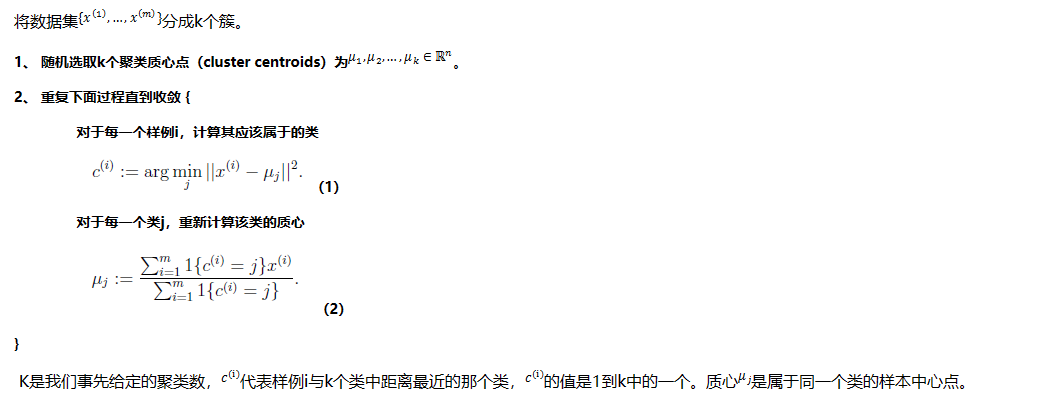

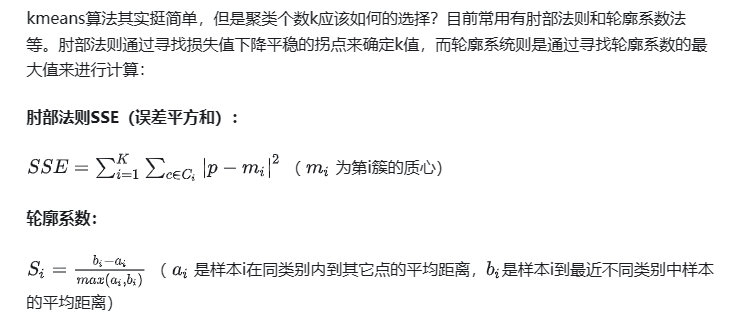

k均值的缺点之一在于，它依赖于随机初始化，也就是说，算法的输出依赖于随机种子，k均值还有一个缺点就是对簇形状的假设约束性较强，而且还要指定所要寻找的簇的个数。

# 数据准备

In [1]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # k均值
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
#读取数据
data = pd.read_csv("../data/blobs.csv")
print(data.head())

           a         b  label
0  -0.794152  2.104951      0
1  -9.151552 -4.812864      1
2 -11.441826 -4.457814      1
3  -9.767618 -3.191337      1
4  -4.536556 -8.401863      2


In [3]:
#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

## 肘部法获取最佳聚类数

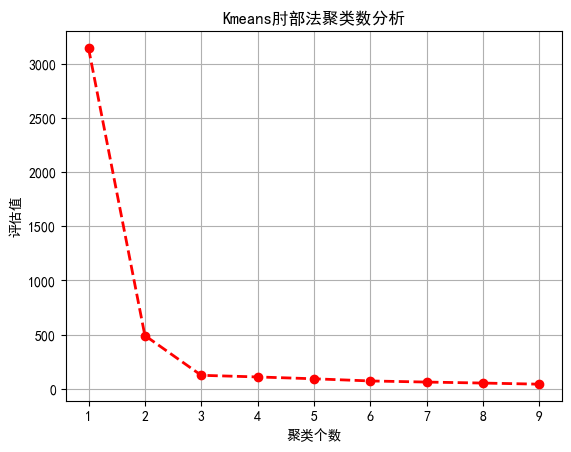

In [20]:
# 使用肘部法进行模型评估
sse = []
for i in range(1, 10):
    cluster = KMeans(n_clusters=i, random_state=0, n_init='auto').fit(x_train)
    inertia = cluster.inertia_
    sse.append(inertia)
plt.plot(range(1, 10), sse, color='red', linewidth=2.0,
         linestyle='--', marker='o', label='sse')
plt.grid(True)
plt.title("Kmeans肘部法聚类数分析")
plt.xlabel("聚类个数")
plt.ylabel("评估值")
plt.savefig("../images/Kmeans肘部法聚类数分析.png", dpi=600)
plt.show()

评估值越小越好，由上图可知，k=3为最佳。

## 轮廓系数法获取最佳聚类数

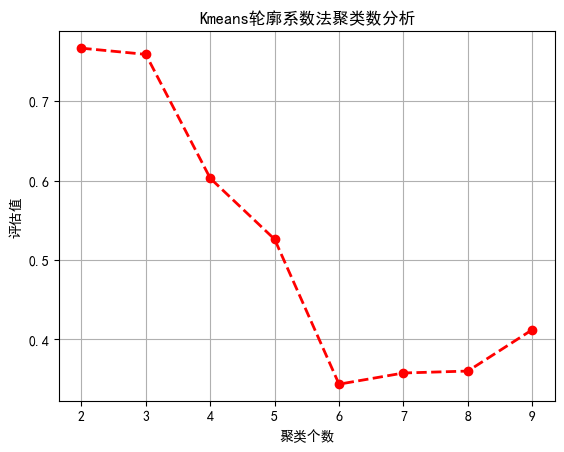

In [19]:
# 使用轮廓系数法进行模型评估
s = []
for i in range(2, 10):
    cluster = KMeans(n_clusters=i, random_state=0, n_init='auto')
    cluster.fit(x_train)
    ss = metrics.silhouette_score(x_train, cluster.labels_, metric='euclidean')
    s.append(ss)
plt.plot(range(2, 10), s, color='red', linewidth=2.0,
         linestyle='--', marker='o', label='sse')
plt.grid(True)
plt.title("Kmeans轮廓系数法聚类数分析")
plt.xlabel("聚类个数")
plt.ylabel("评估值")
plt.savefig("../images/Kmeans轮廓系数法聚类数分析.png", dpi=600)
plt.show()

评估值越大越好。

# 模型训练

In [5]:
# 聚类模型
k = 3
model = KMeans(n_clusters=k, random_state=0)
model.fit(x_train)
model.cluster_centers_ # 聚类中心

array([[ -1.45597086,   4.35412227],
       [-10.07329213,  -3.84038839],
       [ -6.66663341,  -8.25047847]])

Text(0, 0.5, 'Feature 1')

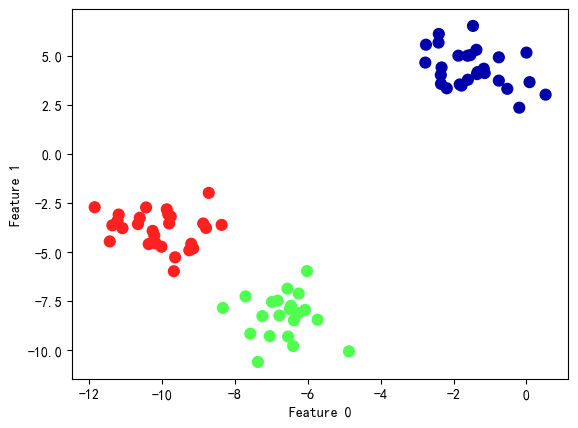

In [6]:
# 绘制聚类结果图
clusters = model.labels_
plt.scatter(x_train.values[:,0], x_train.values[:,1], c=clusters, cmap=mglearn.cm3, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 模型保存

In [7]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../outputs/best_models/kmeans.pkl')

# 加载模型
model = joblib.load('../outputs/best_models/kmeans.pkl')

In [8]:
# 法二
import pickle

with open('../outputs/best_models/kmeans.pkl', 'wb') as f:
    pickle.dump(model, f)

#读取Model
with open('../outputs/best_models/kmeans.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [9]:
prediction = model.predict(x_test)

In [10]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 1.0


In [11]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



# 算法优化

In [2]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
import numpy as np

# 生成模拟数据
X, _ = make_blobs(n_samples=100000, centers=10, n_features=100, random_state=42)

# 使用MiniBatchKMeans
kmeans = MiniBatchKMeans(
    n_clusters=5,        # 聚类数量
    batch_size=1024,      # 每批处理的数据量
    max_iter=100,         # 最大迭代次数
    random_state=42
)

# 训练模型
kmeans.fit(X)

# 查看聚类中心
print("聚类中心:", kmeans.cluster_centers_)
print("迭代次数:", kmeans.n_iter_)

聚类中心: [[ 4.15603579 -6.95700193  1.53403251  2.13455647 -1.55025192  4.72065518
   8.70927696  8.51206762 -0.99557184 -7.74862781  9.68684176  6.77293002
  -7.50697329  8.42374477  7.37394899  0.39485379  1.83032166 -2.02399819
  -8.89697787 -3.302267    6.03255064 -9.91072843 -3.3587859  -2.04133921
   0.74821038  8.36375645 -3.05126795 -3.04052643  4.72205154 -1.01424343
  -5.52045223 -0.96693089 -7.18445531 -6.44166753 -0.01431337 -1.67371895
   8.30150595 -2.73441686  1.61916023  2.63251429 -9.72215152  3.26423995
  -6.43787261  9.2327091  -7.02814349 -1.69888085 -8.30432739  9.93373598
   0.03902425  1.92839296 -8.65957286  4.9704553  -5.7854118   7.96729272
  -5.90911229 -6.19992615 -9.23761704 -0.55467886  1.30423318 -8.70310301
   5.5246517  -0.96272606  0.49905652 -1.20095835 -2.00508671  1.21234252
  -6.92551644 -6.34374534  7.24632848  8.94732611 -2.57380502 -4.54174999
   2.88729363 -1.8179343  -9.50836879 -6.88459284  4.31886552  3.2135851
  -9.46157975 -5.56621017 -5.3382

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
